In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


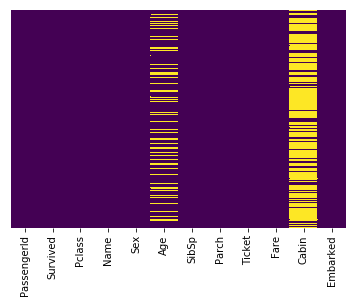

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

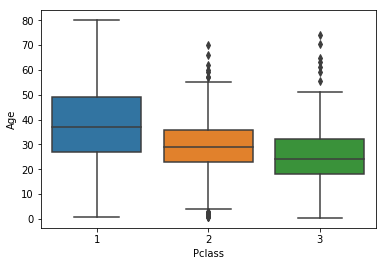

In [8]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [9]:
def fill_age(passenger):
    age = passenger[0]
    pclass = passenger[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [10]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

In [11]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

In [12]:
gender = pd.get_dummies(train['Sex'], drop_first=True)
# print(gender)

In [13]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# print(embark)

In [14]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,gender,embark],axis=1)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


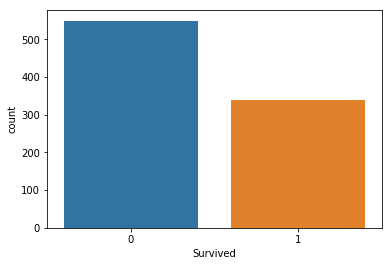

In [16]:
sns.countplot(x='Survived',data=train)

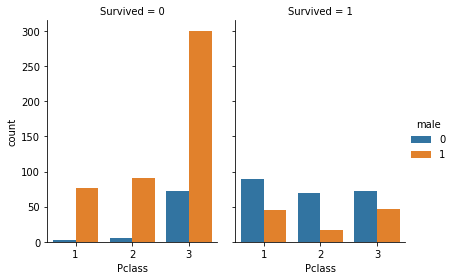

In [17]:
sns.catplot(x="Pclass", hue="male", col="Survived", data=train, kind="count", height=4, aspect=.7)

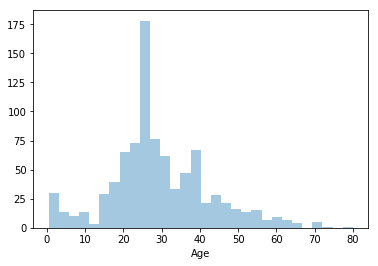

In [18]:
sns.distplot(train['Age'].dropna(), bins=30, kde=False)

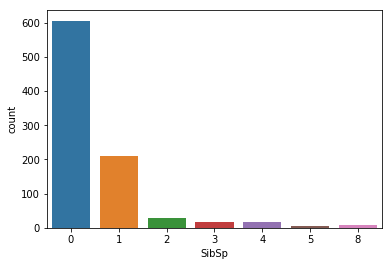

In [19]:
sns.countplot(x='SibSp', data=train)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.85      0.66      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.81       267
weighted avg       0.83      0.82      0.82       267



/opt/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
